In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model



In [2]:
df = pd.read_csv("datasets/NYPD_Hate_Crimes.csv")

In [3]:
df.size

16534

In [4]:
len(df)

1181

In [5]:
df.head()

Full Complaint ID  Complaint Year Number  Month Number Record Create Date  \
0    201904612204817                   2019             2         02/08/2019   
1    201904812229517                   2019             3         03/09/2019   
2    201904812226617                   2019             3         03/08/2019   
3    201904812231317                   2019             3         03/10/2019   
4    201904212405517                   2019             5         05/11/2019   

   Complaint Precinct Code Patrol Borough Name County  \
0                       46   PATROL BORO BRONX  BRONX   
1                       48   PATROL BORO BRONX  BRONX   
2                       48   PATROL BORO BRONX  BRONX   
3                       48   PATROL BORO BRONX  BRONX   
4                       42   PATROL BORO BRONX  BRONX   

  Law Code Category Description           Offense Description  \
0                        FELONY                FELONY ASSAULT   
1                   MISDEMEANOR  ASSAULT 3 & RELATED OFFENSES   
2                   MISDEMEANOR  ASSAULT 3 & RELATED OFFENSES   
3                   MISDEMEANOR  ASSAULT 3 & RELATED OFFENSES   
4                        FELONY                       ROBBERY   

              PD Code Description     Bias Motive Description  \
0        ASSAULT 2,1,UNCLASSIFIED  ANTI-MALE HOMOSEXUAL (GAY)   
1                       ASSAULT 3                  ANTI-WHITE   
2                       ASSAULT 3                  ANTI-WHITE   
3                       ASSAULT 3                  ANTI-WHITE   
4  ROBBERY,POCKETBOOK/CARRIED BAG                 ANTI-MUSLIM   

              Offense Category Arrest Date  Arrest Id  
0           Sexual Orientation  02/08/2019  B31678218  
1                   Race/Color  03/09/2019  B31682790  
2                   Race/Color  03/09/2019  B31682806  
3                   Race/Color  03/09/2019  B31682806  
4  Religion/Religious Practice  05/10/2019  B31692174

In [6]:
df_ = df.groupby(["County"]).mean()

In [7]:
df_.head()

Full Complaint ID  Complaint Year Number  Month Number  \
County                                                             
BRONX          2.020078e+14            2020.031579      6.147368   
KINGS          2.019872e+14            2019.796526      6.337469   
NEW YORK       2.020156e+14            2020.140143      5.681710   
QUEENS         2.020174e+14            2020.065116      5.948837   
RICHMOND       2.020313e+14            2020.191489      5.787234   

          Complaint Precinct Code  
County                             
BRONX                   45.915789  
KINGS                   75.024814  
NEW YORK                15.847981  
QUEENS                 108.683721  
RICHMOND               120.978723

In [8]:
df_bronx = df.loc[df["County"]=="BRONX"]
df_kings = df.loc[df["County"]=="KINGS"]
df_NY = df.loc[df["County"]=="NEW YORK"]
df_queens = df.loc[df["County"]=="QUEENS"]
df_richmond = df.loc[df["County"]=="RICHMOND"]

In [9]:
print(df_bronx.size, df_kings.size, df_NY.size, df_queens.size, df_richmond.size)
print(df_bronx.size + df_kings.size + df_NY.size + df_queens.size + df_richmond.size)

1330 5642 5894 3010 658
16534


In [10]:
print(len(df_bronx), len(df_kings),len(df_NY), len(df_queens), len(df_richmond))

95 403 421 215 47


In [11]:
df_bronx["Record Create Date"][0]

'02/08/2019'

In [12]:
def numeric_date(s):
    date = s.split('/')
    date = [int(x) for x in date]
    return date
def add_date(s, n):
    date = s.copy()
    days = []
    if(date[2] == 2020):
        days = [31,29,31,30,31,30,31,31,30,31,30,31]
    else:
        days = [31,28,31,30,31,30,31,31,30,31,30,31]
    date[1] = date[1]+n
    while date[1] > days[date[0]-1]:
        date[1] = date[1] - days[date[0]-1]
        date[0] = date[0] + 1
        if date[0] > 12:
            date[0] = date[0] - 12
            date[2] = date[2] + 1
            if(date[2] == 2020):
                days = [31,29,31,30,31,30,31,31,30,31,30,31]
            else:
                days = [31,28,31,30,31,30,31,31,30,31,30,31]
    return date
def numeric_date2(s):
    date = s.split('/')
    s = date[2] + date[0] + date[1]
    
    
    return int(s)
def numeric_date3(date):
    date = [str(x) for x in date]
    s = date[2]
    if len(date[0]) == 1:
        s = s+"0"+date[0]
    else:
        s = s+date[0]
    if len(date[1]) == 1:
        s = s+"0"+date[1]
    else:
        s = s+date[1]
    return int(s)
date = numeric_date('02/08/2019')

numeric_date3(add_date(date, 14))

20190222

In [13]:
numeric_date2('02/08/2019')

20190208

In [14]:
a = df["Record Create Date"].apply(numeric_date2)
print(a.min(),a.max())

20190101 20210930


In [15]:
dates = [numeric_date('01/01/2021')]
size = 14 #number of days
print(dates)
while numeric_date3(dates[-1]) < a.max():
    new_date = add_date(dates[-1], size)
    dates.append(new_date)
dates = [numeric_date3(x) for x in dates]
print(dates)

[[1, 1, 2021]]
[20210101, 20210115, 20210129, 20210212, 20210226, 20210312, 20210326, 20210409, 20210423, 20210507, 20210521, 20210604, 20210618, 20210702, 20210716, 20210730, 20210813, 20210827, 20210910, 20210924, 20211008]


In [16]:
def plot_result(df):
    
    num_crime = np.zeros(len(dates)-1)
    for d in df["Record Create Date"].apply(numeric_date2):
        for i in range(len(num_crime)):
            if d >= dates[i] and d < dates[i+1]:
                num_crime[i] = num_crime[i] + 1
                break;
    return num_crime

    plt.plot(num_crime) 
    
plt.figure(figsize=(8, 6), dpi=80)
plot_result(df_bronx)
plot_result(df_kings)
plot_result(df_NY)
plot_result(df_queens)
plot_result(df_richmond)

array([0., 0., 0., 1., 0., 2., 2., 1., 1., 0., 2., 0., 5., 0., 1., 1., 1.,
       2., 0., 0.])

<Figure size 640x480 with 0 Axes>

In [24]:
df_income = pd.read_csv("datasets/income.csv")
df_hate_crime = pd.read_csv("datasets/final_hate_num.csv")
df_vaccinate = pd.read_csv("data/vaccinate.csv")

In [25]:
dates = [numeric_date('01/01/2021')]
size = 14 #number of days
print(dates)
while numeric_date3(dates[-1]) < a.max():
    new_date = add_date(dates[-1], size)
    dates.append(new_date)
dates = [numeric_date3(x) for x in dates]
print(dates)

def get_result(df):
    
    num_crime = np.zeros(len(dates)-1)
    for d in df["Record Create Date"].apply(numeric_date2):
        for i in range(len(num_crime)):
            if d >= dates[i] and d < dates[i+1]:
                num_crime[i] = num_crime[i] + 1
                break;
    return num_crime

bronx = get_result(df_bronx)
kings = get_result(df_kings)
ny = get_result(df_NY)
queens = get_result(df_queens)
richmond = get_result(df_richmond)

[[1, 1, 2021]]
[20210101, 20210115, 20210129, 20210212, 20210226, 20210312, 20210326, 20210409, 20210423, 20210507, 20210521, 20210604, 20210618, 20210702, 20210716, 20210730, 20210813, 20210827, 20210910, 20210924, 20211008]


In [26]:
print(df_income.shape, df_hate_crime.shape, df_vaccinate.shape)

(5, 2) (5, 21) (5, 21)


In [27]:
len(bronx)

20

In [28]:
df_hate_crime

county  20210115  20210129  20210212  20210226  20210312  20210326  \
0          Bronx     0.436     0.397     0.363     0.364     0.377     0.394   
1       Brooklyn     0.428     0.374     0.324     0.334     0.365     0.390   
2      Manhattan     0.439     0.373     0.352     0.367     0.357     0.399   
3         Queens     0.453     0.377     0.386     0.381     0.389     0.421   
4  Staten Island     0.287     0.623     0.701     0.603     0.560     0.587   

   20210409  20210423  20210507  ...  20210604  20210618  20210702  20210716  \
0     0.354     0.354     0.351  ...     0.334     0.354     0.373     0.326   
1     0.373     0.381     0.354  ...     0.356     0.356     0.337     0.342   
2     0.377     0.375     0.376  ...     0.298     0.339     0.355     0.326   
3     0.386     0.360     0.404  ...     0.383     0.359     0.344     0.359   
4     0.681     0.670     0.642  ...     0.598     0.585     0.539     0.502   

   20210730  20210813  20210827  20210910  20210924  20211008  
0     0.331     0.347     0.359     0.364     0.313     0.330  
1     0.325     0.360     0.345     0.338     0.339     0.344  
2     0.310     0.317     0.327     0.328     0.317     0.327  
3     0.326     0.373     0.373     0.360     0.324     0.353  
4     0.504     0.500     0.490     0.493     0.486     0.476  

[5 rows x 21 columns]

In [253]:
#bronx:
result = [bronx, kings, ny, queens, richmond]

for i in range(0,5):

    hc = list(df_hate_crime.iloc[i])

    hc = hc[1::]


    vac = list(df_vaccinate.iloc[i])

    vac = vac[1::]

    vac.insert(0,0)
    
    vac_prev = vac[0:20]
    
    vac = vac[1:21]
    vac_p = np.array(vac)-np.array(vac_prev)
    
    X = np.array([hc, vac, vac_p]).T

    regr = linear_model.LinearRegression()
    regr.fit(X, result[i])

    #predicted = regr.predict([[3300, 1300]])
    #print(regr.coef_)
    print(county_name[i]+":", regr.coef_[0], regr.coef_[1], regr.coef_[2])

bronx: 13.384387038871166 0.23096699162562362 104.16190807267876
kings: 26.732426251858463 5.996959853132924 86.63660995511245
ny: -64.78478803804182 3.750705409252732 140.6896350869178
queens: 28.398930543803825 5.542825870677807 63.92285710341337
richmond: 0.8956821048818336 1.3521533365573137 9.794015631419875


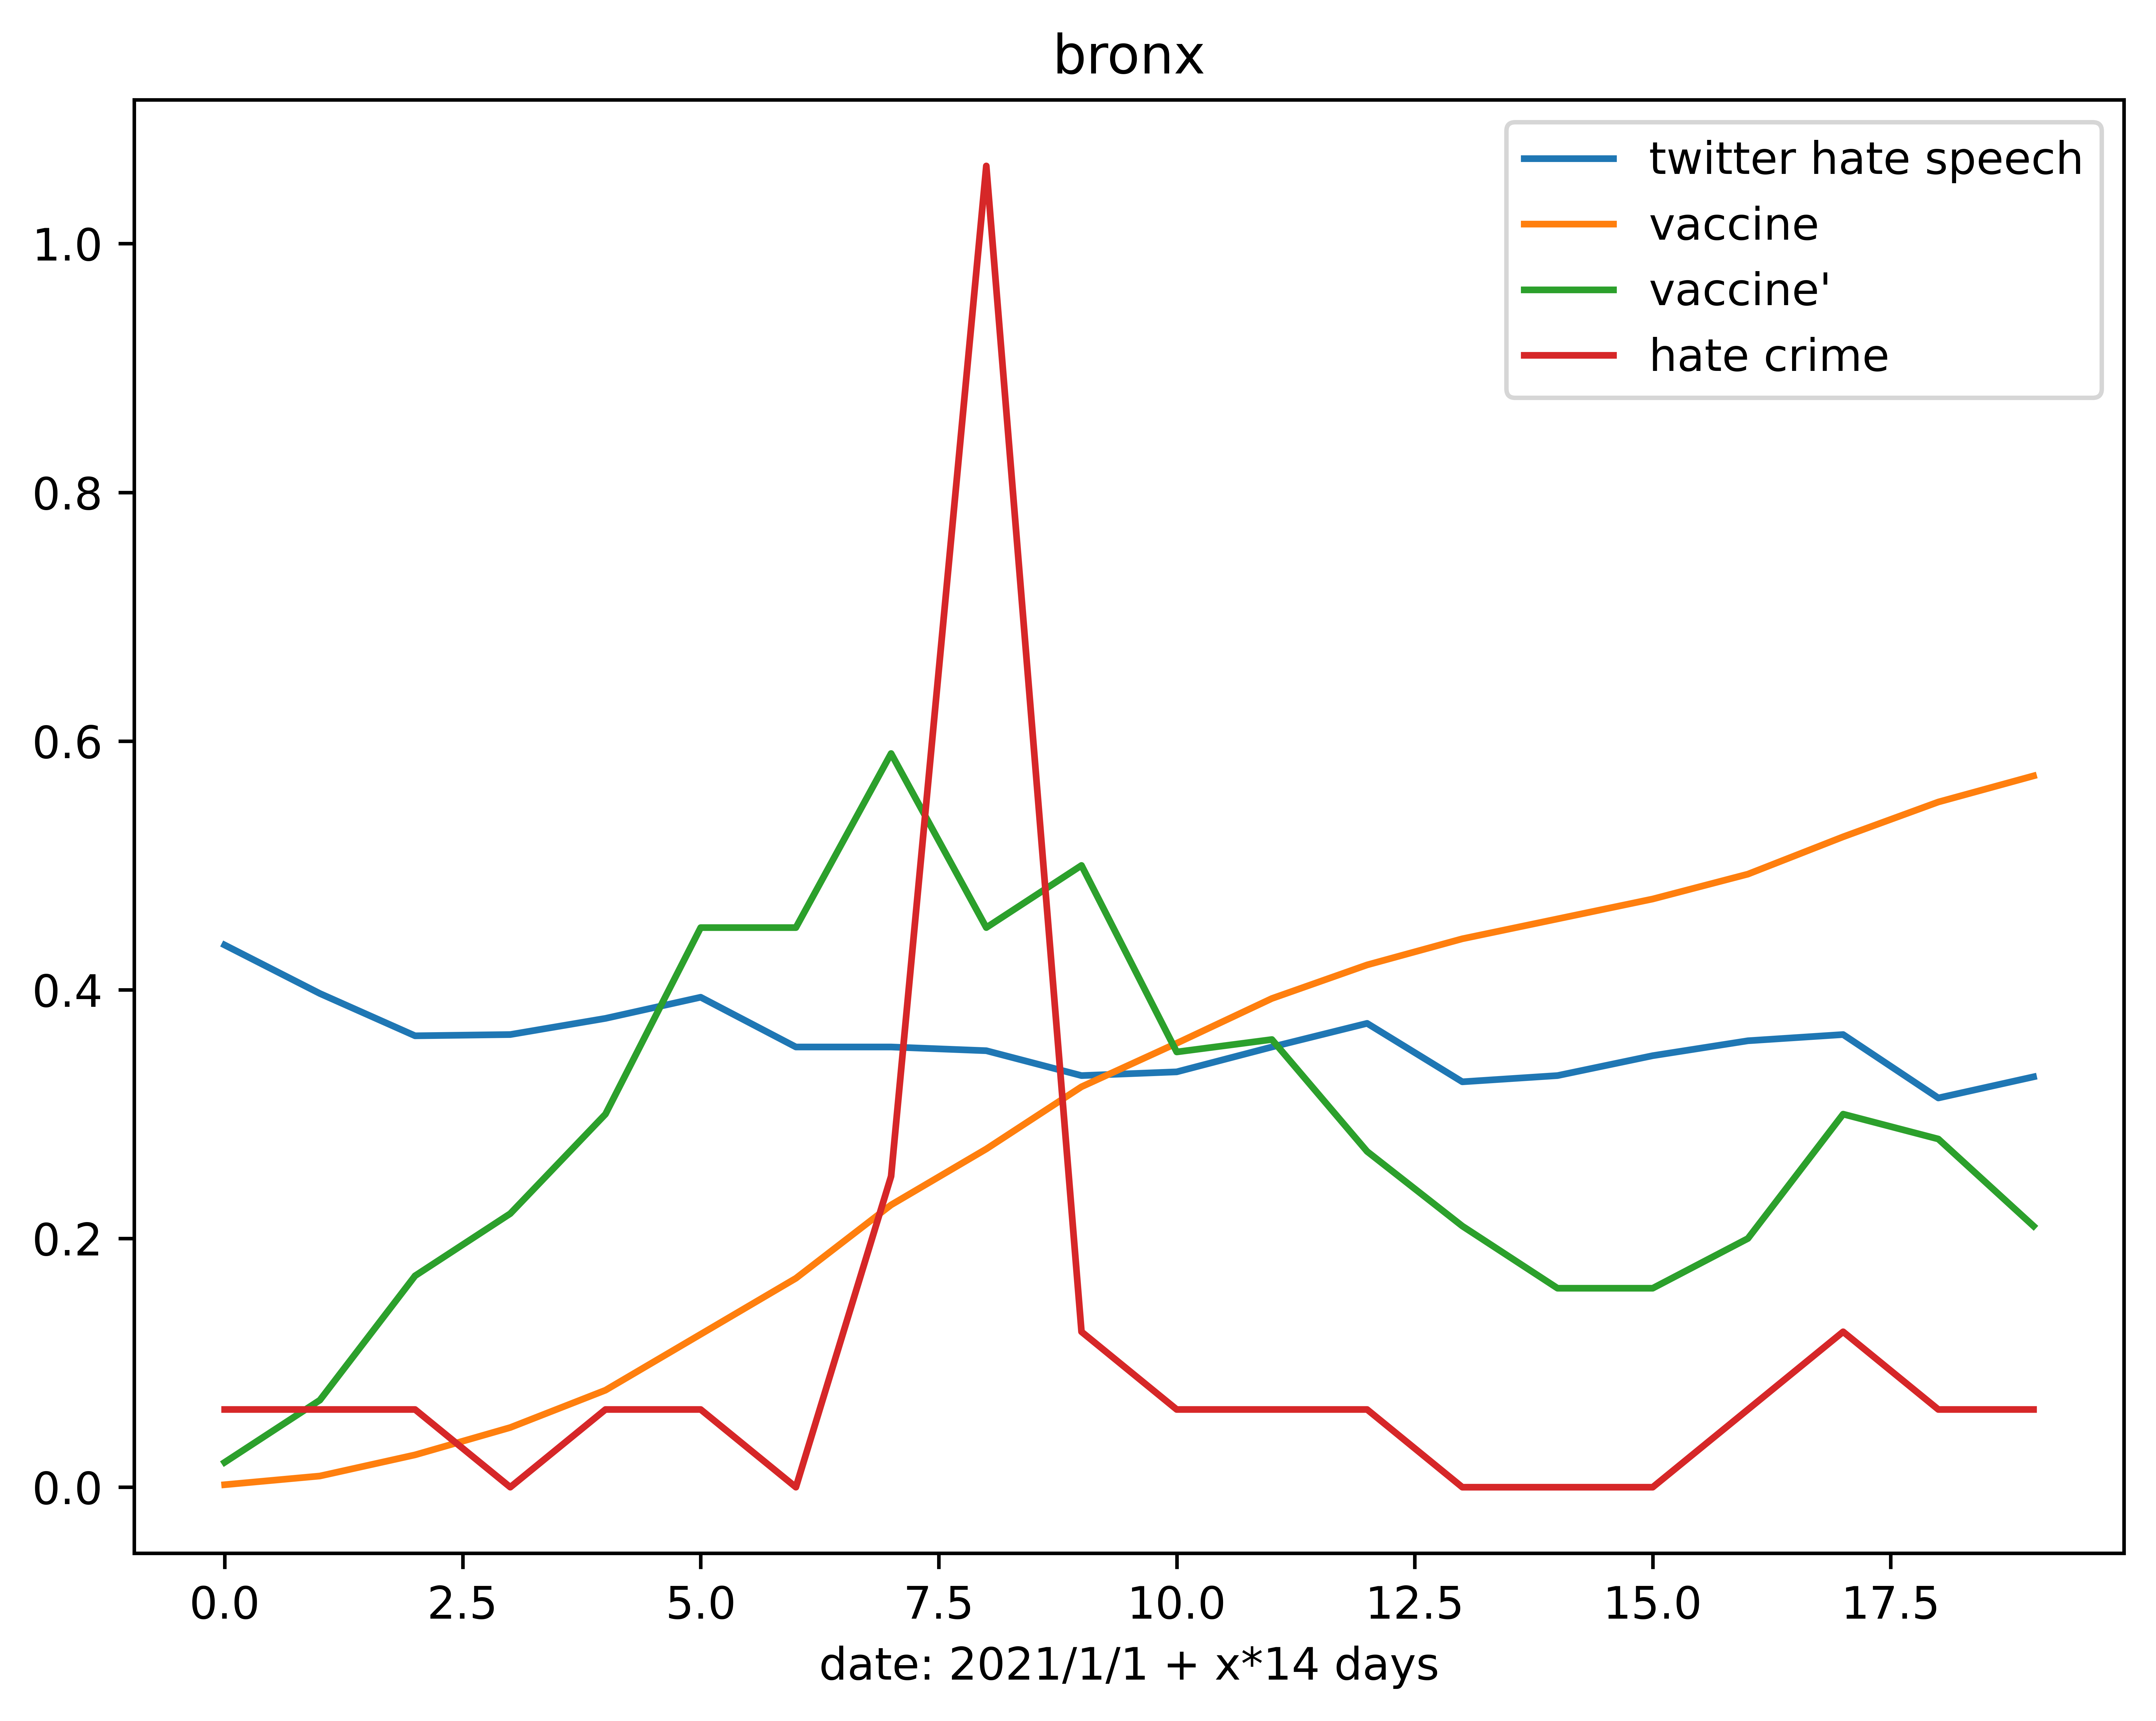

[ 1.  1.  1.  0.  1.  1.  0.  4. 17.  2.  1.  1.  1.  0.  0.  0.  1.  2.
  1.  1.]


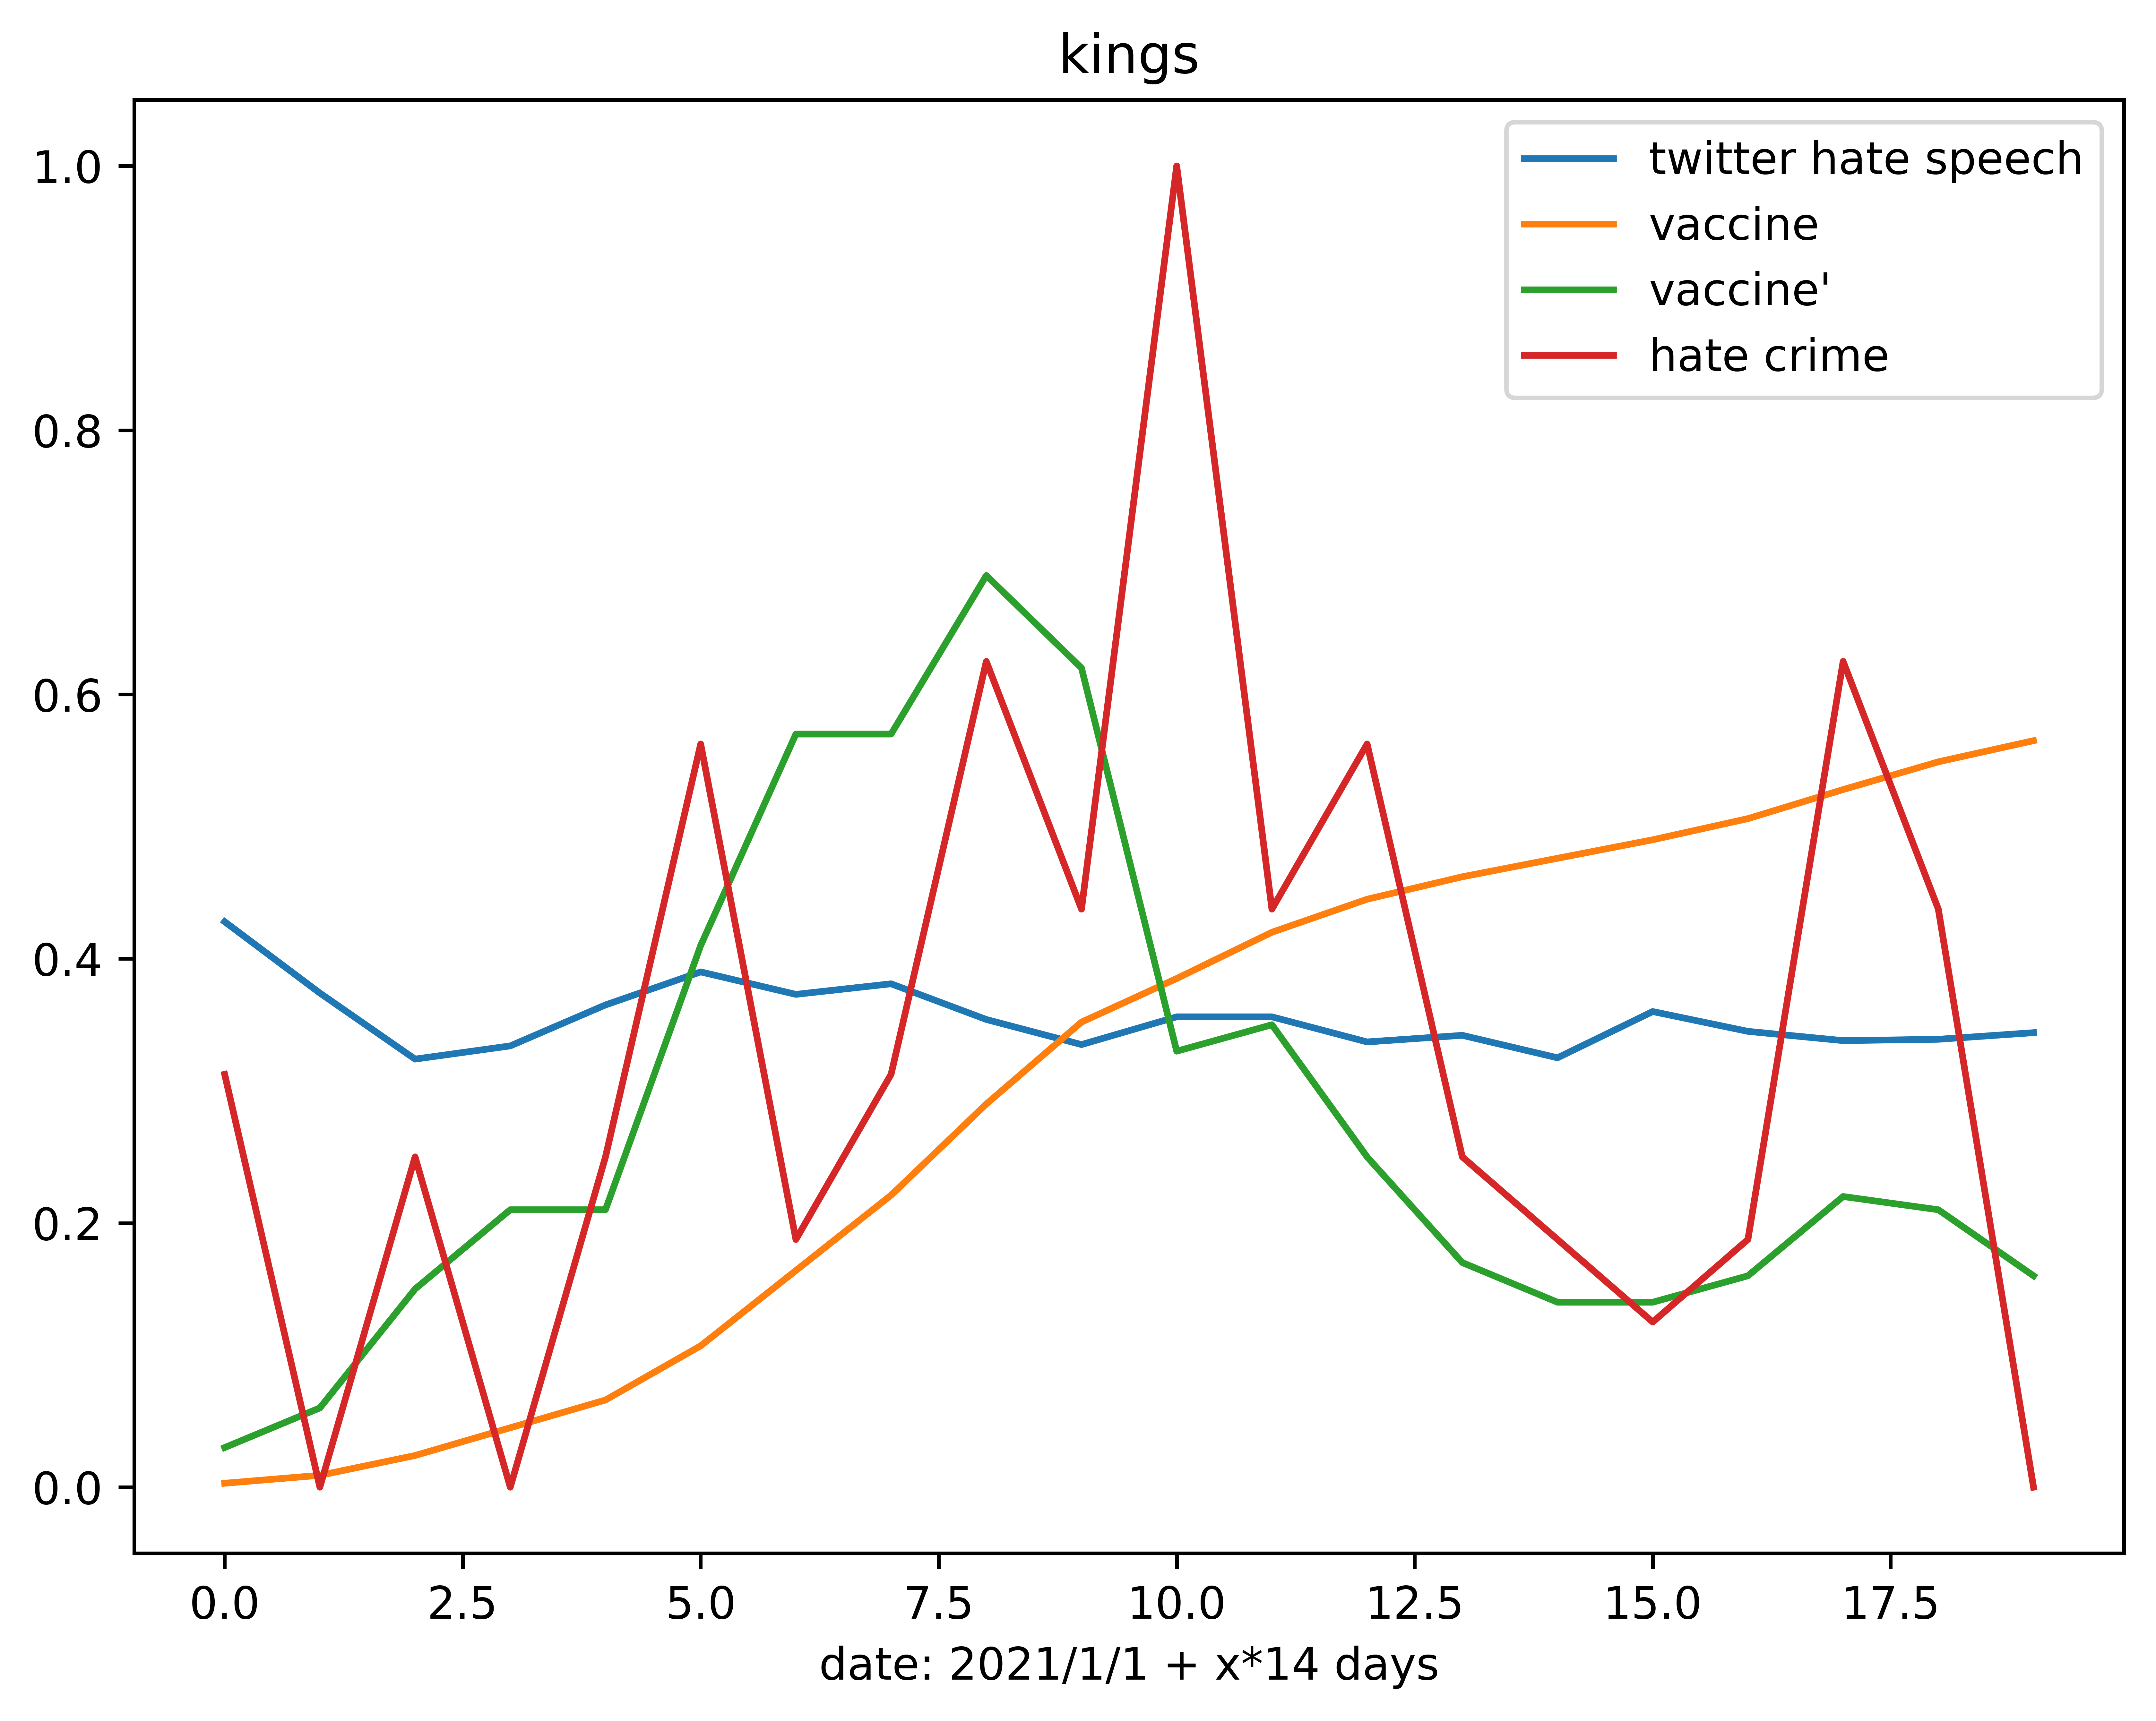

[ 5.  0.  4.  0.  4.  9.  3.  5. 10.  7. 16.  7.  9.  4.  3.  2.  3. 10.
  7.  0.]


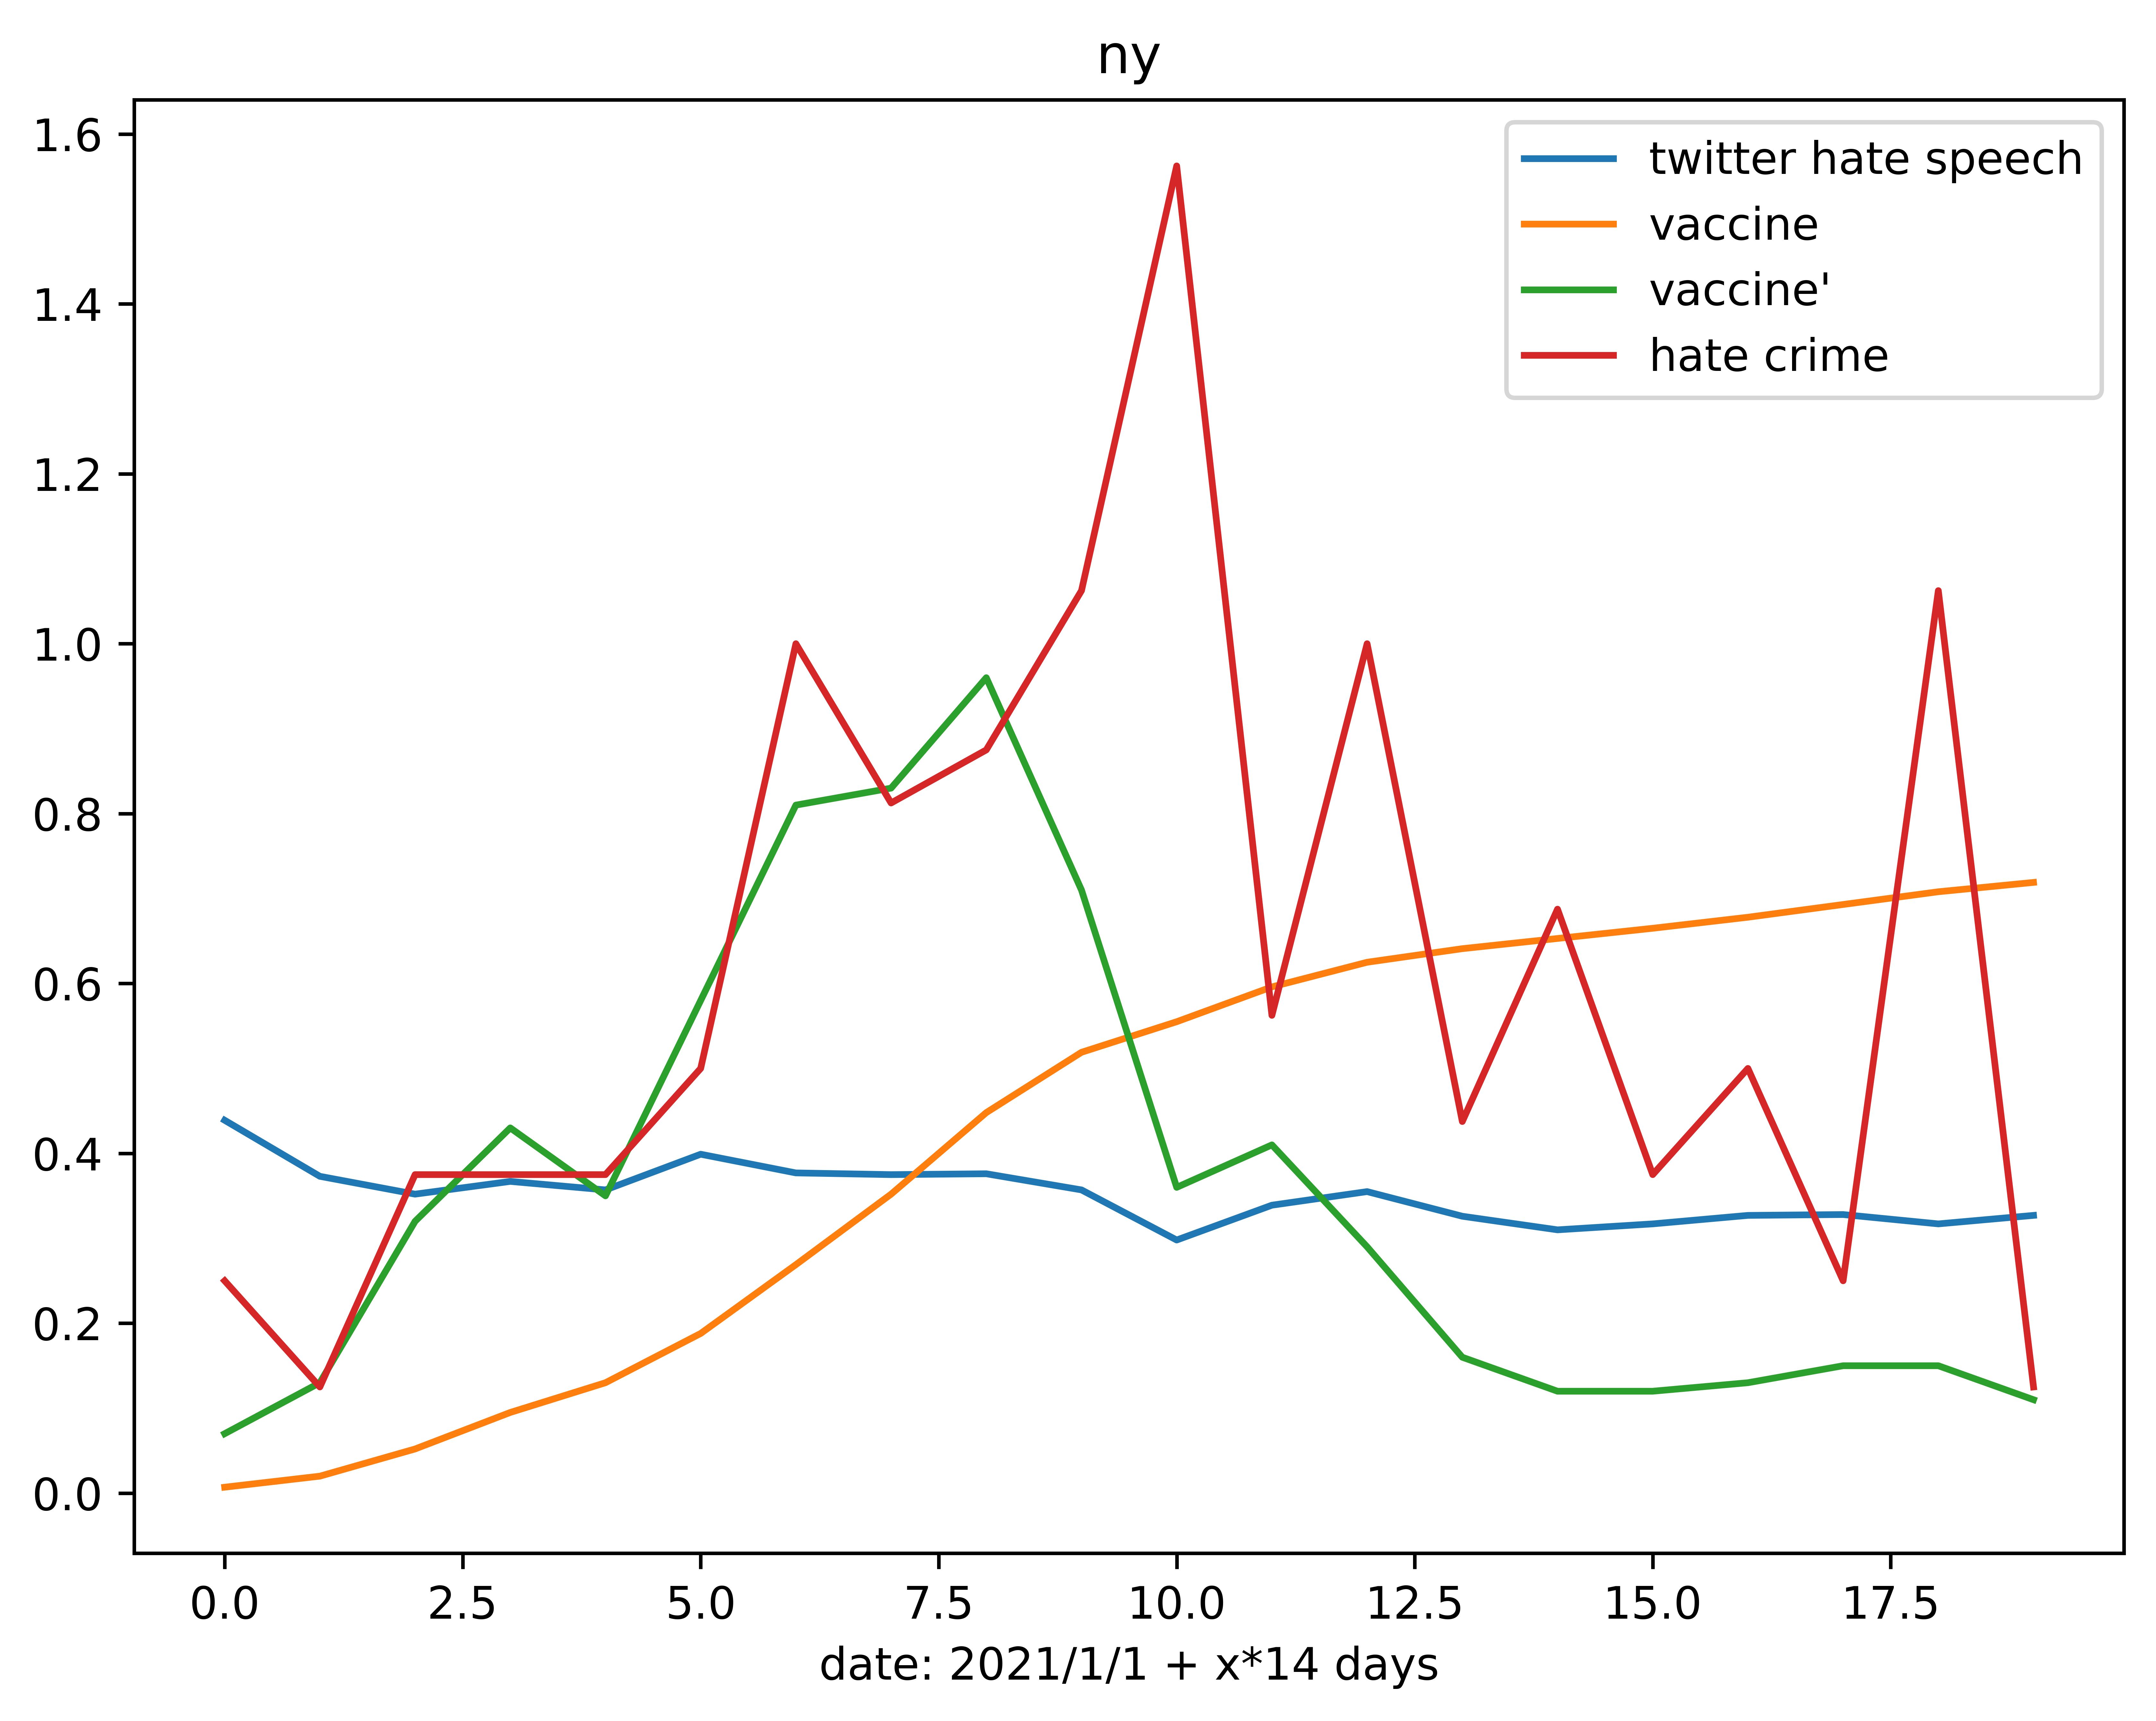

[ 4.  2.  6.  6.  6.  8. 16. 13. 14. 17. 25.  9. 16.  7. 11.  6.  8.  4.
 17.  2.]


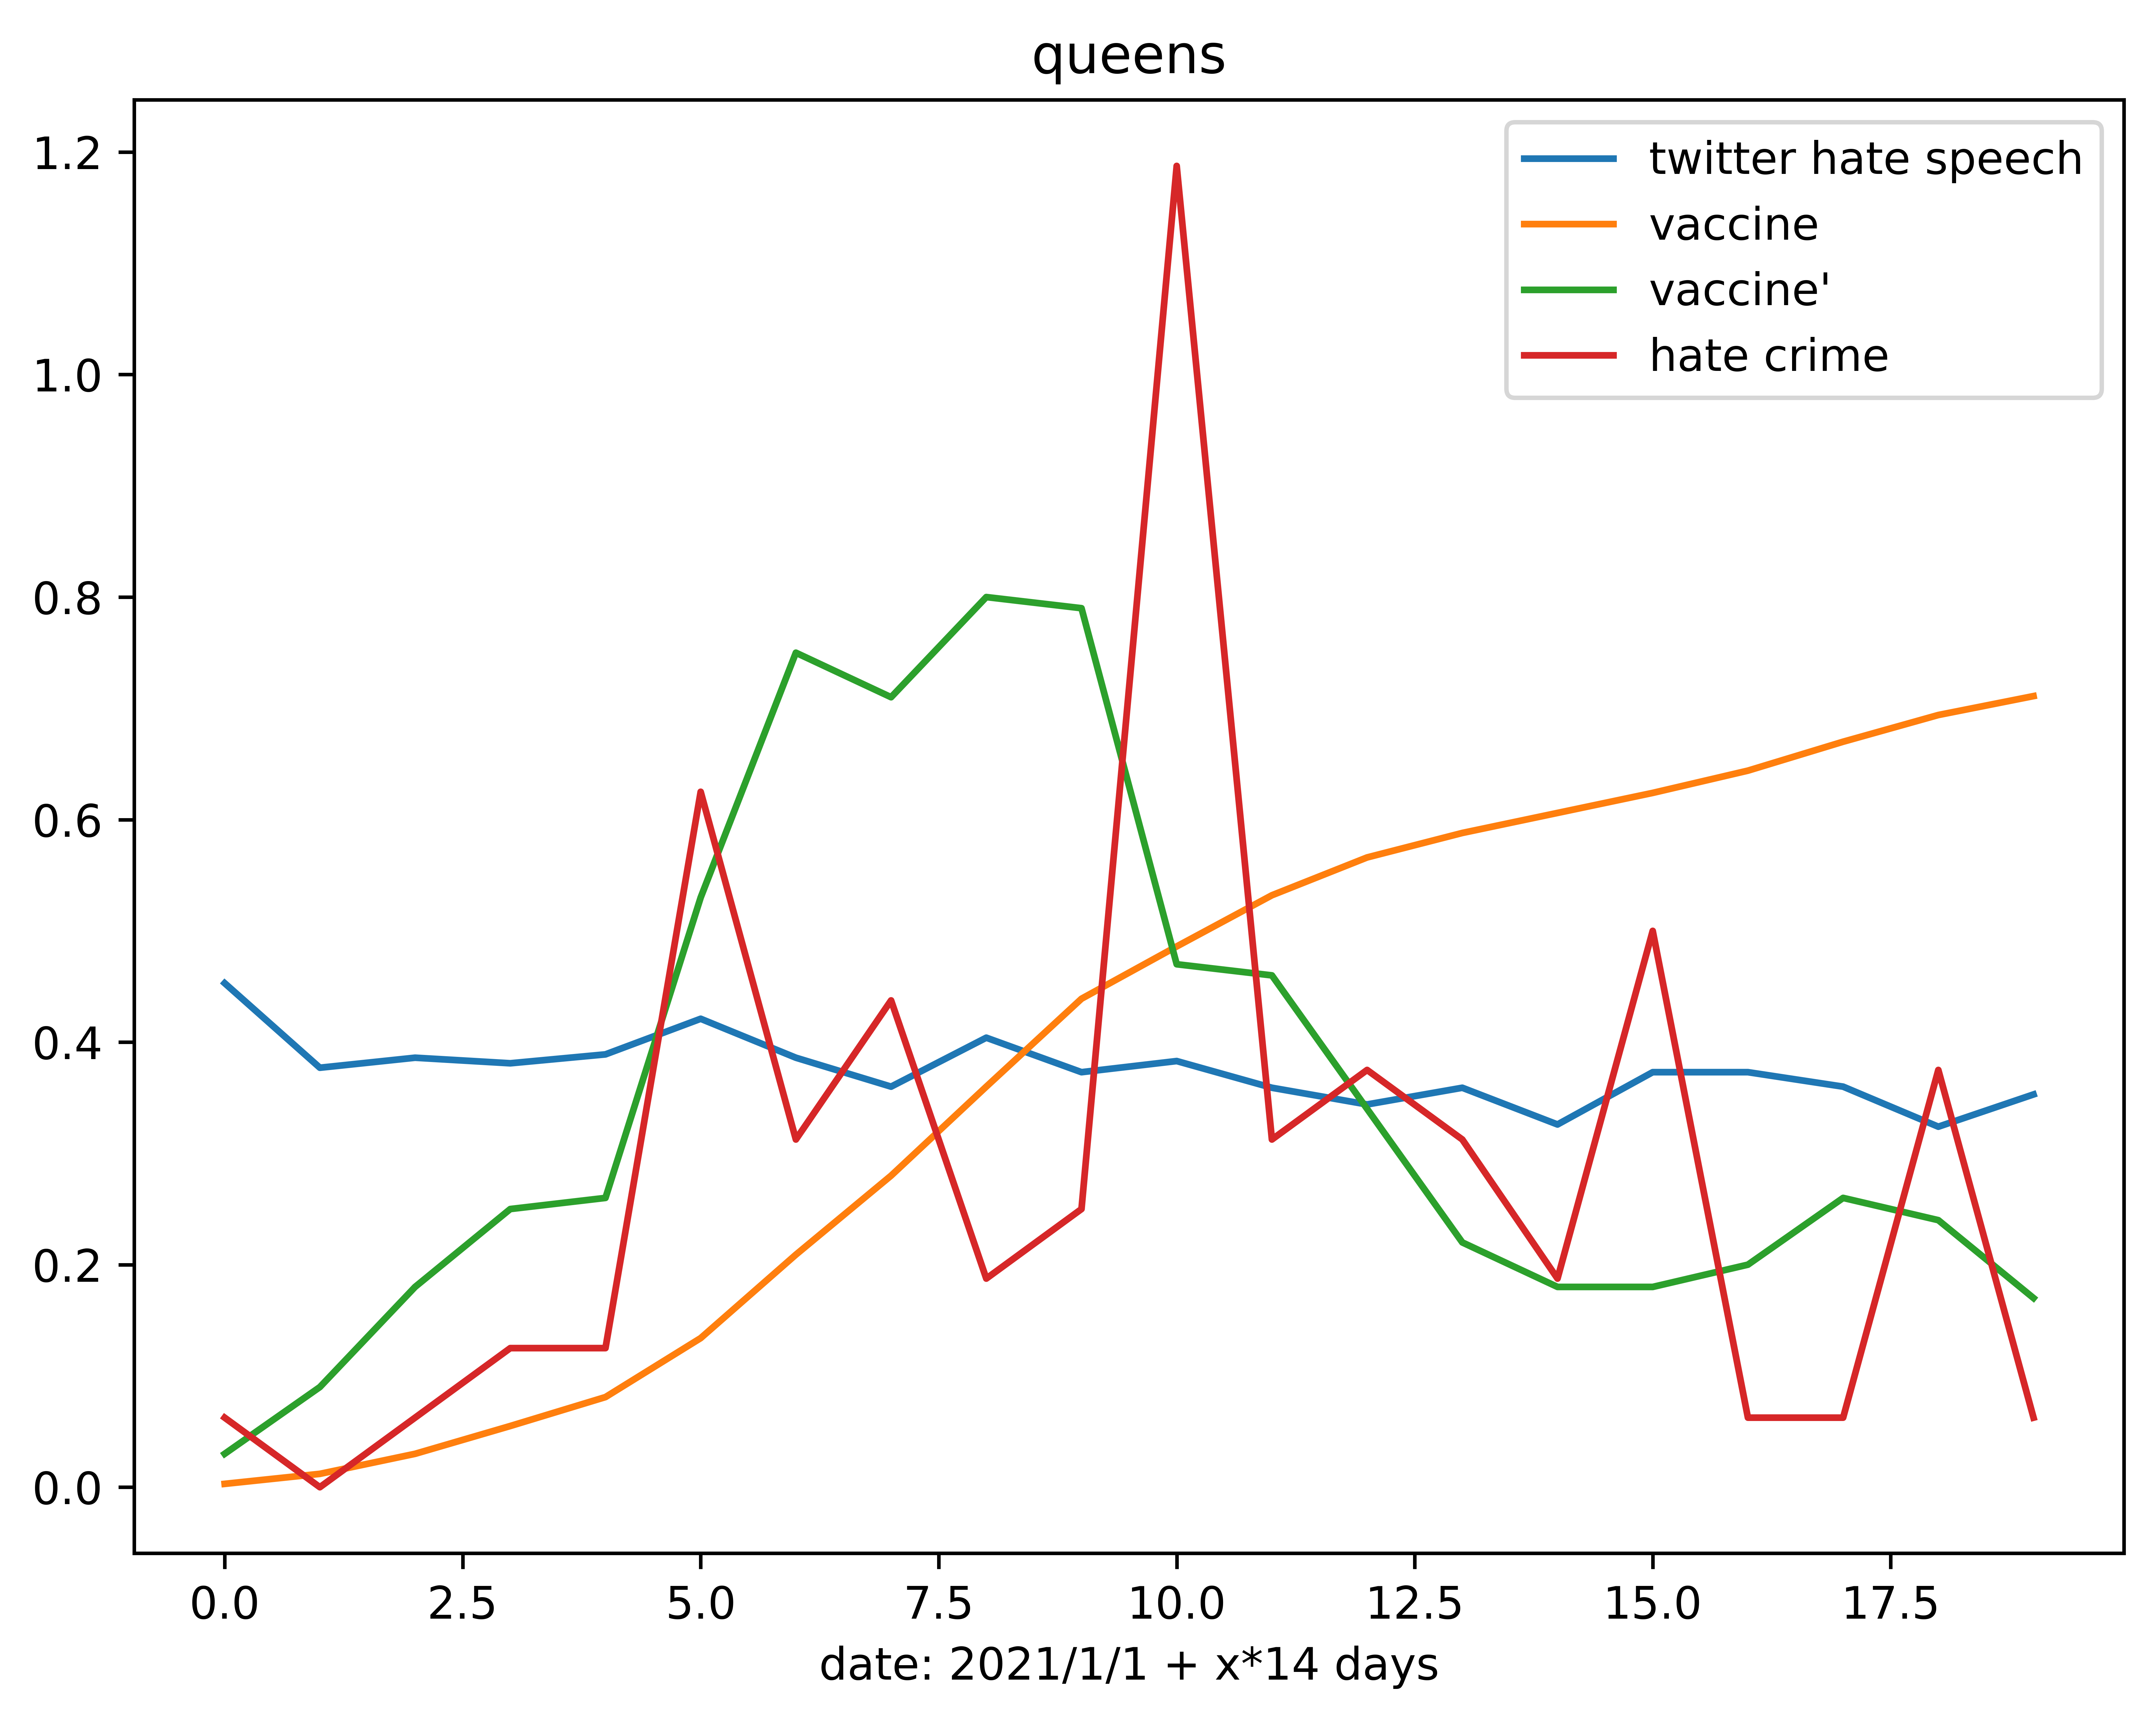

[ 1.  0.  1.  2.  2. 10.  5.  7.  3.  4. 19.  5.  6.  5.  3.  8.  1.  1.
  6.  1.]


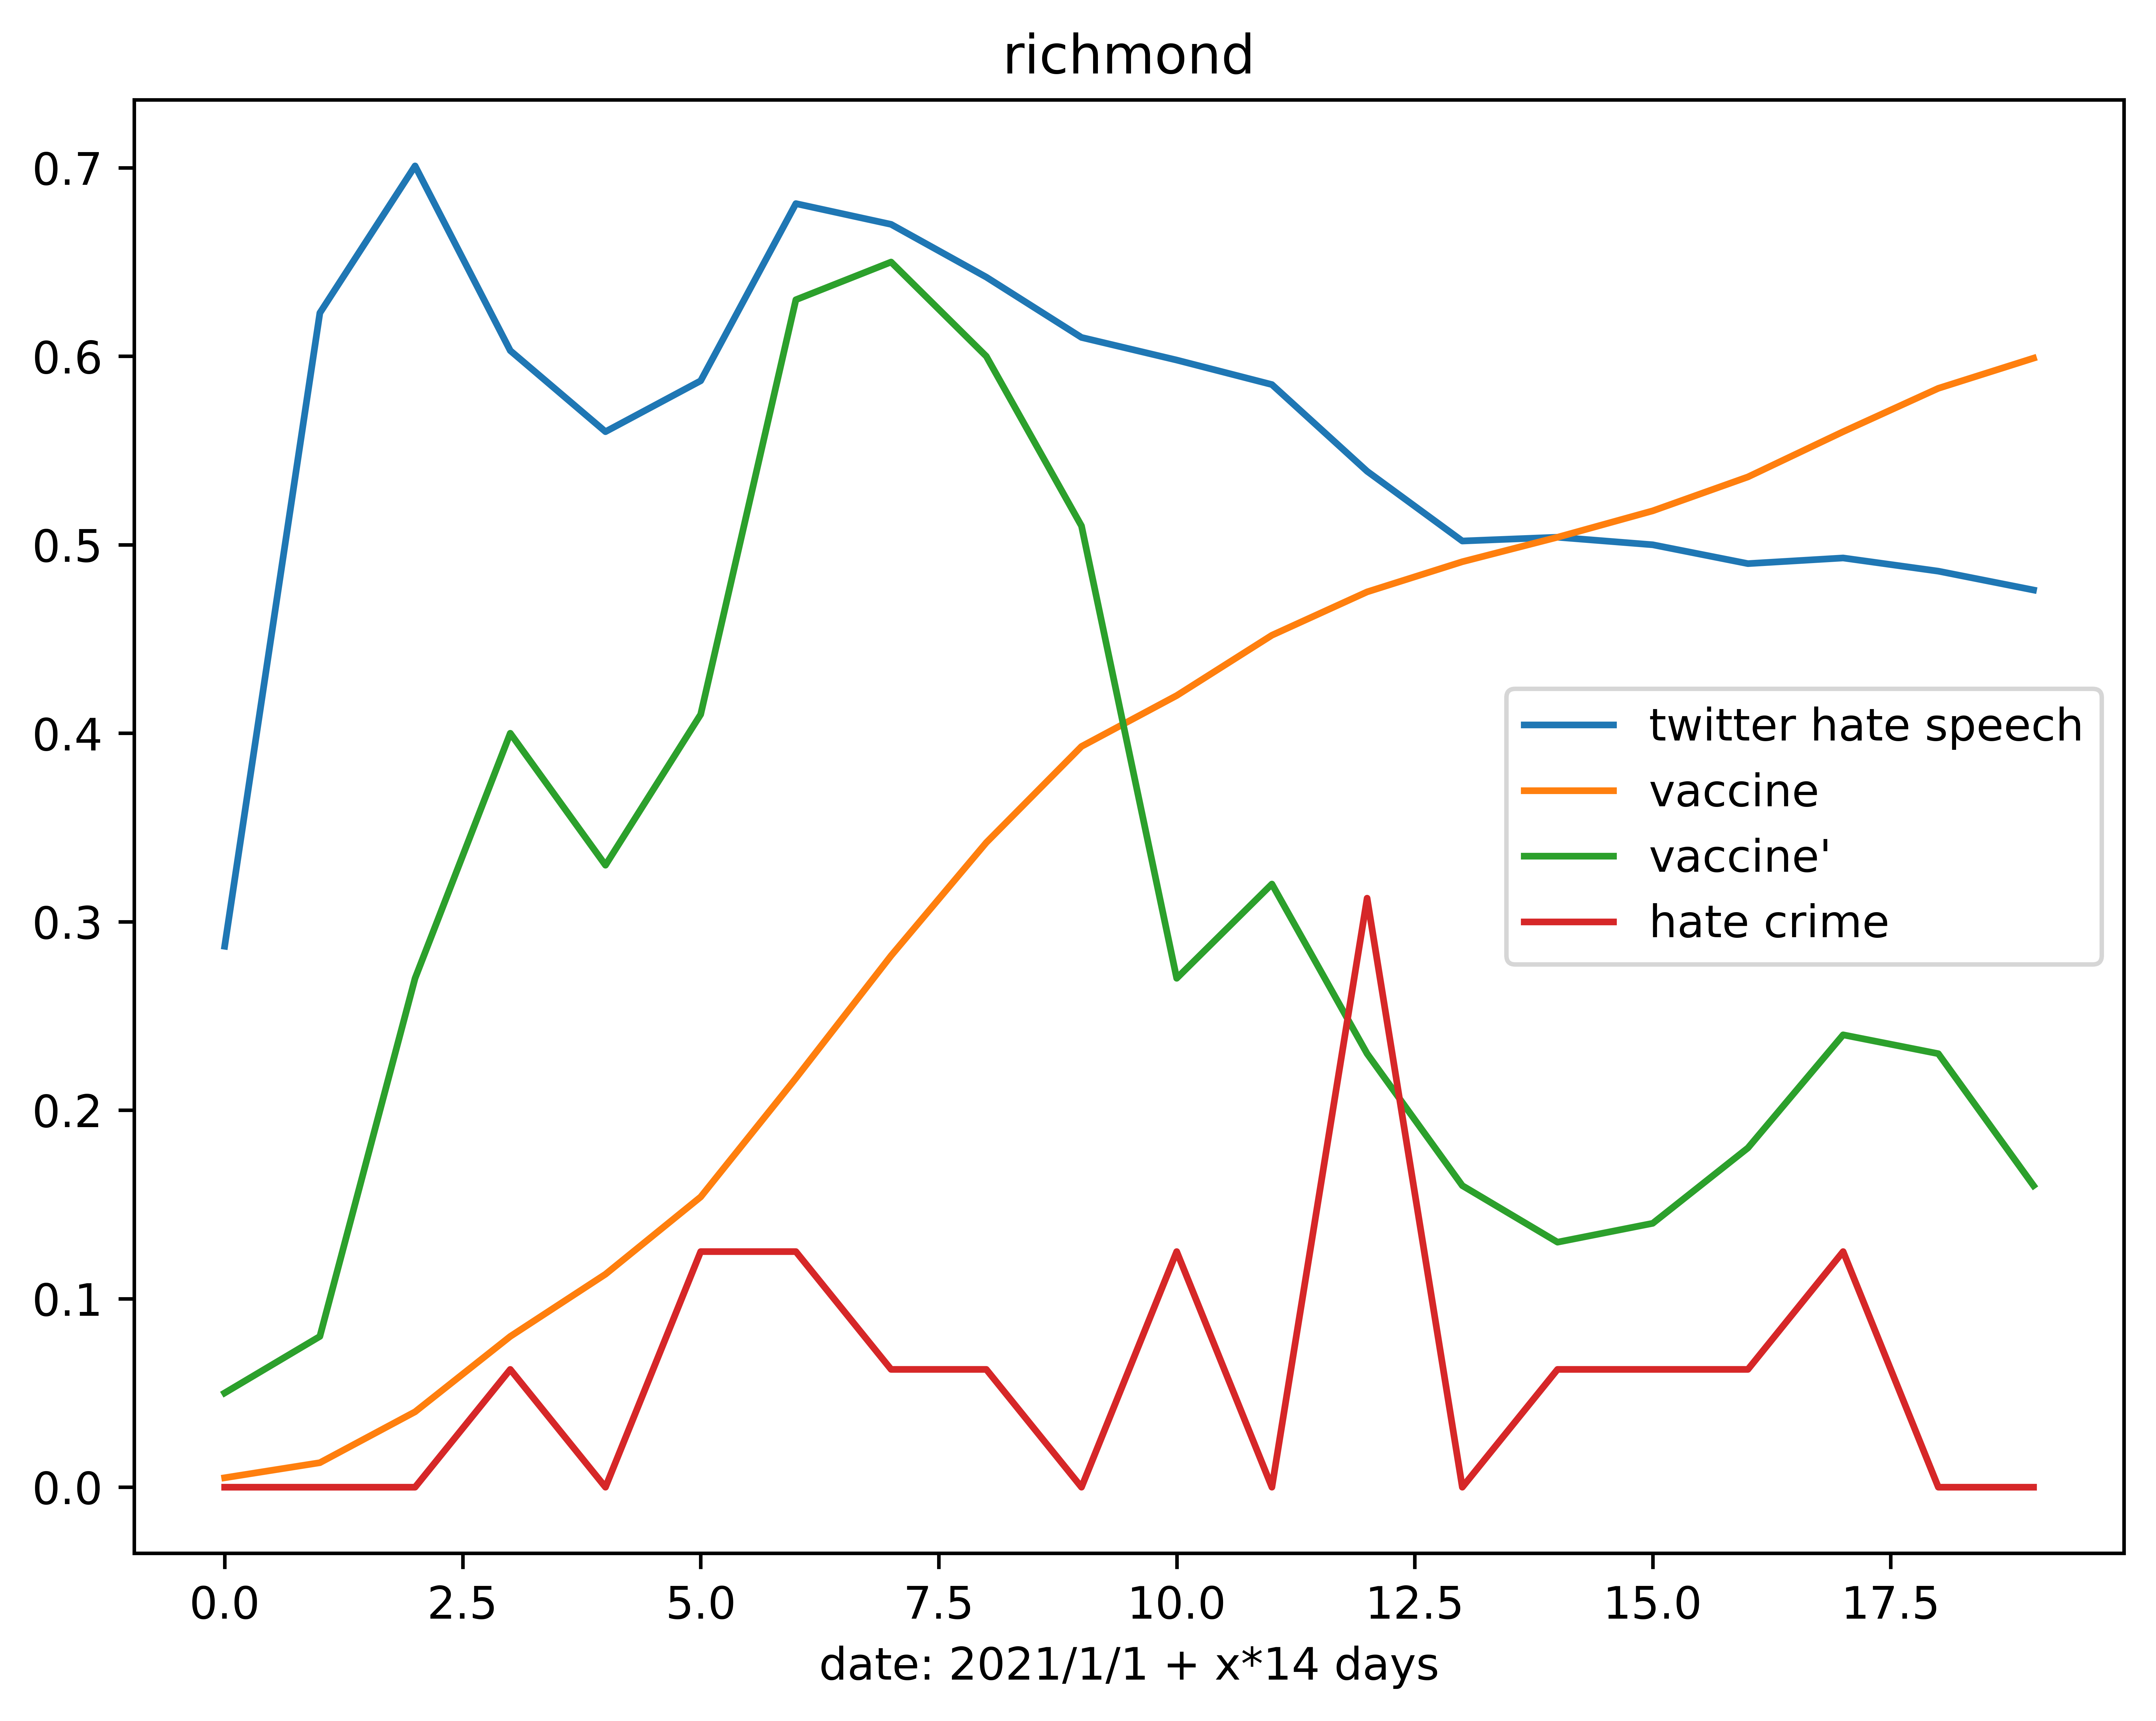

[0. 0. 0. 1. 0. 2. 2. 1. 1. 0. 2. 0. 5. 0. 1. 1. 1. 2. 0. 0.]


In [187]:
county_name = ["bronx", "kings", "ny", "queens", "richmond"]

for i in range(0,5):
    
    plt.figure(figsize=(8, 6), dpi=1000)
    
    hc = list(df_hate_crime.iloc[i])

    hc = hc[1::]


    vac = list(df_vaccinate.iloc[i])

    vac = vac[1::]

    plt.plot(hc, label = "twitter hate speech")
    plt.plot(vac, label = "vaccine")
    
    vac.insert(0,0)
    
    vac_prev = vac[0:20]
    
    vac = vac[1:21]
    vac = np.array(vac)-np.array(vac_prev)

    
    plt.plot(vac*10, label = "vaccine'")
    plt.plot(result[i]/16, label = "hate crime")
    plt.title(county_name[i])
    plt.xlabel("date: 2021/1/1 + x*14 days")
    plt.legend()
    plt.show()
    
    print(result[i])


In [107]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [108]:
clf.score([[0, 0], [0, 1], [0, 1]],[0,0,0])

1.0

In [109]:
hc = list(df_hate_crime.iloc[i])

hc = hc[1::]


vac = list(df_vaccinate.iloc[i])

vac = vac[1::]

vac.insert(0,0)

vac_prev = vac[0:20]

vac = vac[1:21]
vac_prime = np.array(vac)-np.array(vac_prev)

X = np.array([hc, vac, vac_prime]).T

y = result[i]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 2), random_state=1)
clf.fit(X, y)

print(clf.predict([X[12]]))
clf.predict_proba([X[12]])

[1.]


array([[0.25000391, 0.55003871, 0.10001828, 0.04997546, 0.04996364]])

In [110]:
print(X)

[[0.436 0.002 0.002]
 [0.397 0.009 0.007]
 [0.363 0.026 0.017]
 [0.364 0.048 0.022]
 [0.377 0.078 0.03 ]
 [0.394 0.123 0.045]
 [0.354 0.168 0.045]
 [0.354 0.227 0.059]
 [0.351 0.272 0.045]
 [0.331 0.322 0.05 ]
 [0.334 0.357 0.035]
 [0.354 0.393 0.036]
 [0.373 0.42  0.027]
 [0.326 0.441 0.021]
 [0.331 0.457 0.016]
 [0.347 0.473 0.016]
 [0.359 0.493 0.02 ]
 [0.364 0.523 0.03 ]
 [0.313 0.551 0.028]
 [0.33  0.572 0.021]]


In [111]:
print(result[i])

[ 1.  1.  1.  0.  1.  1.  0.  4. 17.  2.  1.  1.  1.  0.  0.  0.  1.  2.
  1.  1.]


In [112]:
print(result[i][12])

1.0


In [116]:
X = []
y = []
for i in range(0,5):
    hc = list(df_hate_crime.iloc[i])

    hc = hc[1::]


    vac = list(df_vaccinate.iloc[i])

    vac = vac[1::]

    vac.insert(0,0)

    vac_prev = vac[0:20]

    vac = vac[1:21]
    vac_prime = np.array(vac)-np.array(vac_prev)

    X += list(np.array([hc, vac, vac_prime]).T)
    
    y += list(result[i])

for i in range(0, len(X)):
    X[i] = list(X[i])
    #y[i] = list(y[i])

In [129]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 15), random_state=1, max_iter = 100000)
clf.fit(X, y)

print(clf.predict([X[12]]))
print(clf.predict_proba([X[12]]),len(clf.predict_proba([X[12]])[0]))
print(clf.score(X, y))

[1.]
[[1.83826192e-07 9.72567168e-01 3.06085710e-03 5.91193154e-08
  1.29044629e-02 9.65714848e-03 3.62489220e-17 1.82231793e-23
  1.81012077e-03 3.97319576e-11 7.16576095e-11 4.20908035e-36
  1.38204330e-26 2.15346344e-32 6.38287614e-11 7.40399157e-13
  1.98035965e-24 2.65296462e-36]] 18
0.64


In [85]:
clf.score(X, y)

0.22

In [156]:
def cross_validate(t):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=t, random_state=1, max_iter = 100000)
    
    x10 = [[]]*10
    y10 = [[]]*10
    for i in range(0,len(X)):

        x10[i % 10].append(X[i])
        y10[i % 10].append(y[i])
    score = np.zeros(10)
    for i in range(0,10):
        x_test = x10[i]
        y_test = y10[i]
        x_train = []
        y_train = []
        for j in range(0,10):
            if i == j:
                continue
            else:
                x_train += x10[j]
                y_train += y10[j]
        clf.fit(x_train, y_train)
        score[i] = clf.score(x_test, y_test)
        print(score)
    return score.mean()
        
cross_validate((15,15))   

0.6100000000000001

In [159]:
size = 15
scores = np.zeros([size,size])
for i in range(1,size):
    for j in range(1,size):
        scores[i][j] = cross_validate((i,j))

In [255]:
scores.max()

0.86

In [258]:
print(int((scores.argmax()-14)/15), int(scores.argmax()%15))

11 14


In [174]:
scores[11,14]

0.86

In [193]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(11, 14), random_state=1, max_iter = 100000)
clf.fit(X, y)

print(clf.predict([X[8]]))
print(clf.predict_proba([X[8]]),len(clf.predict_proba([X[8]])[0]))
print(clf.score(X, y))
print(result[0][8])

[5.]
[[1.76183196e-03 2.99295729e-02 1.94177049e-05 1.03368047e-01
  3.41354223e-03 2.77357196e-01 1.47150460e-03 3.39799327e-02
  6.38497720e-05 7.94662773e-03 7.32878349e-03 2.46655197e-06
  1.09040101e-01 2.49176763e-04 2.10867685e-01 2.13181774e-01
  1.83920169e-05 9.95939639e-08]] 18
0.56
17.0


In [228]:
l = []
for i in result:
    l += list(i)
l = set(l)
print(l)
l = list(l)
l.sort()
for i in range(0, len(l)):
    l[i] = int(l[i])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 16.0, 17.0, 19.0, 25.0}


In [229]:
print(l,len(l))
print(clf.predict_proba([X[30]]),len(clf.predict_proba([X[30]])[0]))
print(result[1][10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 19, 25] 18
[[5.92488146e-05 4.74228528e-03 1.10897774e-06 6.54921873e-03
  1.38757665e-04 3.54573793e-02 4.33564528e-05 1.58359145e-01
  3.00803611e-06 6.28364977e-04 4.39969369e-03 1.54626946e-06
  6.63254204e-02 1.40204146e-04 6.25197978e-01 9.79417318e-02
  1.14904113e-05 6.21584649e-08]] 18
16.0


In [259]:
print("hate crime number at " + county_name[1])
for i in range(0,18):
    print("number:", int(l[i]), "with probability", clf.predict_proba([X[30]])[0][i])
print(result[1][10])

hate crime number at kings


IndexError: index 30 is out of bounds for axis 0 with size 20

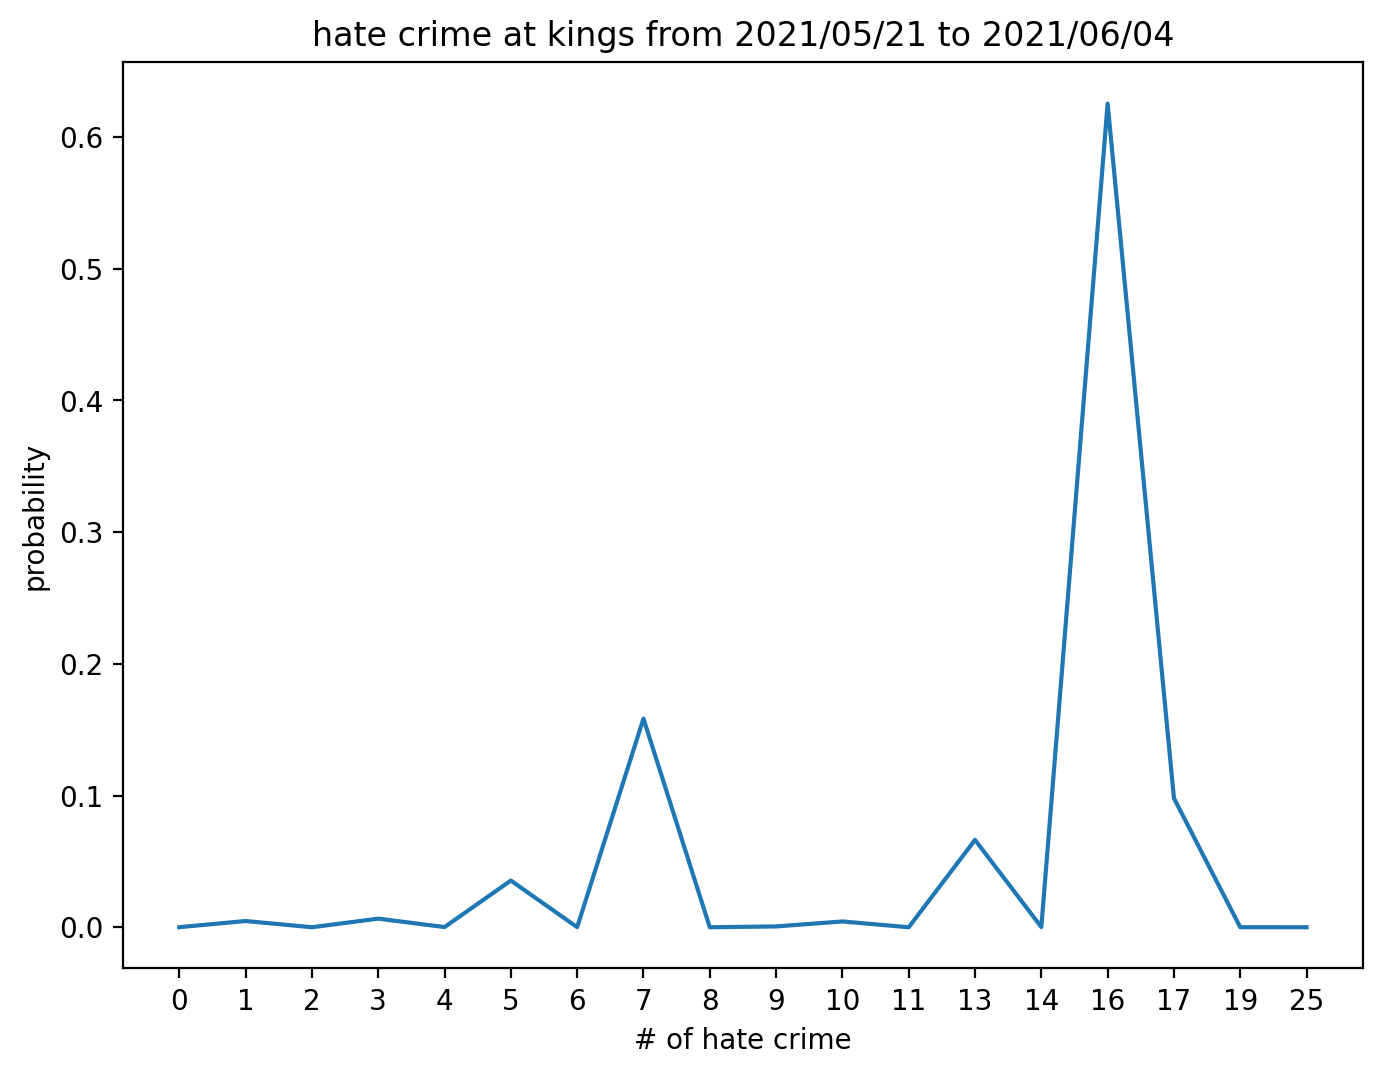

actual result:16


In [248]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(clf.predict_proba([X[30]])[0])
plt.xticks(np.arange(18), l)
plt.title("hate crime at kings from 2021/05/21 to 2021/06/04")
plt.ylabel("probability")
plt.xlabel("# of hate crime")

plt.show()
print("actual result:"+ str(int(result[1][10])))